# Baseball Pitch Modeling

In [37]:
import pandas as pd
import pybaseball
from pybaseball import statcast
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


## Data Collection

In [26]:
selected_columns = [
    'game_date', 'player_name', 'release_speed', 'release_pos_x', 'release_pos_z', 'pitcher',
    'description', 'pfx_x', 'pfx_z', 'effective_speed', 'release_extension', 'release_spin_rate',
    'estimated_woba_using_speedangle'
]

required_numbers = [
    'game_date', 'player_name', 'release_speed', 'release_pos_x', 'release_pos_z', 'pitcher',
    'description', 'pfx_x', 'pfx_z', 'effective_speed', 'release_extension', 'release_spin_rate',
]


dates = {
    2015: ["2015-04-05", "2015-10-04"],
    2016: ["2016-04-03", "2016-10-02"],
    2017: ["2017-04-02", "2017-10-01"],
    2018: ["2018-03-29", "2018-10-01"],
    2019: ["2019-03-20", "2019-09-29"],
    2020: ["2020-07-23", "2020-09-27"],
    2021: ["2021-04-01", "2021-10-03"],
    2022: ["2022-04-07", "2022-10-05"],
    2023: ["2023-03-30", "2023-10-01"],
    2024: ["2024-03-20", "2024-09-30"]
}

pybaseball.cache.enable()
raw_data = {}

In [44]:
for year in range(2015, 2025):
    df = statcast(start_dt=dates[year][0], end_dt=dates[year][1])[selected_columns + ['game_type']]
    
    df = df[df['game_type'] == 'R']
    df = df.drop(columns='game_type')
    df_cleaned = df.dropna(subset=required_numbers)

    ## turn movement into inches
    df_cleaned['pfx_x'] = df_cleaned['pfx_x'] * 12
    df_cleaned['pfx_z'] = df_cleaned['pfx_z'] * 12
    

    raw_data[year] = df_cleaned
    print(raw_data[year].head())


This is a large query, it may take a moment to complete


100%|██████████| 183/183 [00:28<00:00,  6.43it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


      game_date      player_name  release_speed  release_pos_x  release_pos_z  \
2687 2015-10-04  Familia, Jeurys           97.2           -1.2           6.39   
2718 2015-10-04  Familia, Jeurys           97.5          -1.14           6.53   
2826 2015-10-04  Familia, Jeurys           98.4          -1.19           6.37   
3002 2015-10-04  Familia, Jeurys           97.7          -1.15           6.34   
3049 2015-10-04  Familia, Jeurys           98.2          -1.15           6.34   

      pitcher      description  pfx_x  pfx_z  effective_speed  \
2687   544727    hit_into_play -12.24   2.16             96.5   
2718   544727    called_strike -11.64    6.0             96.5   
2826   544727    hit_into_play -17.04   3.12             97.6   
3002   544727  swinging_strike -14.16   3.84             97.1   
3049   544727             foul -10.44    6.0             97.7   

      release_extension  release_spin_rate  estimated_woba_using_speedangle  
2687                6.1               2018  

/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_x'] = df_cleaned['pfx_x'] * 12
/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_z'] = df_cleaned['pfx_z'] * 12
100%|██████████| 183/183 [00:28<00:00,  6.34it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: Futur

      game_date     player_name  release_speed  release_pos_x  release_pos_z  \
2100 2016-10-02  Osuna, Roberto           96.4          -0.53           6.23   
2184 2016-10-02  Osuna, Roberto           96.8          -0.35           6.34   
2228 2016-10-02  Osuna, Roberto           96.7          -0.56           6.22   
2336 2016-10-02  Osuna, Roberto           97.0          -0.48           6.28   
2415 2016-10-02  Osuna, Roberto           93.6          -0.54           6.23   

      pitcher    description  pfx_x  pfx_z  effective_speed  \
2100   532077  hit_into_play   -7.8  17.16             95.2   
2184   532077  called_strike   -4.8  19.92             95.5   
2228   532077  hit_into_play  -11.4  15.12             95.8   
2336   532077  called_strike   3.12  23.52             96.3   
2415   532077           ball   6.72   11.4             92.0   

      release_extension  release_spin_rate  estimated_woba_using_speedangle  
2100                6.2               2498                    

/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_x'] = df_cleaned['pfx_x'] * 12
/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_z'] = df_cleaned['pfx_z'] * 12
100%|██████████| 183/183 [00:27<00:00,  6.61it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: Futur

      game_date     player_name  release_speed  release_pos_x  release_pos_z  \
2300 2017-10-01  Osuna, Roberto           91.9          -1.19           5.99   
2336 2017-10-01  Osuna, Roberto           91.8          -1.08           6.18   
2479 2017-10-01  Osuna, Roberto           94.7          -0.62           6.34   
2544 2017-10-01  Osuna, Roberto           82.8          -0.99           6.06   
2684 2017-10-01  Osuna, Roberto           95.9          -0.89           6.13   

      pitcher    description  pfx_x  pfx_z  effective_speed  \
2300   532077  hit_into_play  -0.72  18.48             91.0   
2336   532077           foul   3.72  14.04             91.5   
2479   532077           ball  -3.24  22.08             94.2   
2544   532077           ball -15.24  16.56             82.6   
2684   532077           ball -14.28   18.0             95.8   

      release_extension  release_spin_rate  estimated_woba_using_speedangle  
2300                5.9               2422                    

/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_x'] = df_cleaned['pfx_x'] * 12
/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_z'] = df_cleaned['pfx_z'] * 12
100%|██████████| 187/187 [00:28<00:00,  6.56it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: Futur

     game_date     player_name  release_speed  release_pos_x  release_pos_z  \
249 2018-10-01  Jansen, Kenley           92.2          -1.97           6.26   
254 2018-10-01  Jansen, Kenley           93.0          -1.77            6.3   
260 2018-10-01  Jansen, Kenley           91.6          -1.75           6.22   
269 2018-10-01  Jansen, Kenley           93.1          -1.42           6.19   
275 2018-10-01  Jansen, Kenley           91.4          -1.91           6.26   

     pitcher      description  pfx_x  pfx_z  effective_speed  \
249   445276  swinging_strike   4.68  16.08             94.1   
254   445276             foul   6.24  15.12             94.6   
260   445276    called_strike   7.68  13.68             93.4   
269   445276    called_strike  -5.16   16.8             95.4   
275   445276    called_strike   6.72  14.16             93.3   

     release_extension  release_spin_rate  estimated_woba_using_speedangle  
249                7.0               2629                      

/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_x'] = df_cleaned['pfx_x'] * 12
/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_z'] = df_cleaned['pfx_z'] * 12
100%|██████████| 194/194 [00:30<00:00,  6.41it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: Futur

      game_date      player_name  release_speed  release_pos_x  release_pos_z  \
2049 2019-09-29  Herrera, Kelvin           91.1          -2.16           6.08   
2189 2019-09-29  Herrera, Kelvin           88.2          -2.22           6.07   
2218 2019-09-29  Herrera, Kelvin           95.8          -1.55           6.41   
2325 2019-09-29  Herrera, Kelvin           90.1          -2.16           6.01   
2477 2019-09-29  Herrera, Kelvin           98.2          -1.47           6.24   

      pitcher      description  pfx_x  pfx_z  effective_speed  \
2049   516969  swinging_strike   -0.6    4.8             89.9   
2189   516969             foul   2.28   5.52             87.1   
2218   516969             ball  -10.8  17.04             95.2   
2325   516969             ball   1.68    4.2             88.7   
2477   516969    called_strike  -4.08  14.04             98.5   

      release_extension  release_spin_rate  estimated_woba_using_speedangle  
2049                5.8               2347  

/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_x'] = df_cleaned['pfx_x'] * 12
/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_z'] = df_cleaned['pfx_z'] * 12
100%|██████████| 67/67 [00:10<00:00,  6.52it/s]


      game_date player_name  release_speed  release_pos_x  release_pos_z  \
2847 2020-09-27  Hand, Brad           91.6           2.31           6.19   
2974 2020-09-27  Hand, Brad           80.4           2.45           6.12   
3162 2020-09-27  Hand, Brad           80.8           2.27           6.09   
3287 2020-09-27  Hand, Brad           80.5           2.41           6.12   
3427 2020-09-27  Hand, Brad           81.4           2.35           6.14   

      pitcher      description  pfx_x  pfx_z  effective_speed  \
2847   543272    hit_into_play  10.32  15.84             90.8   
2974   543272             ball  -12.6  -0.36             79.2   
3162   543272  swinging_strike  -16.8   -1.8             79.9   
3287   543272             foul -20.28   0.36             79.1   
3427   543272  swinging_strike -19.92   0.48             80.3   

      release_extension  release_spin_rate  estimated_woba_using_speedangle  
2847                5.6               2524                             0.0

/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_x'] = df_cleaned['pfx_x'] * 12
/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_z'] = df_cleaned['pfx_z'] * 12
100%|██████████| 186/186 [00:29<00:00,  6.25it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: Futur

      game_date  player_name  release_speed  release_pos_x  release_pos_z  \
2990 2021-10-03  Smith, Will           92.3            1.4            6.8   
3144 2021-10-03  Smith, Will           80.6            1.6           6.64   
3296 2021-10-03  Smith, Will           75.5           1.46           6.88   
3450 2021-10-03  Smith, Will           75.0           1.53           6.83   
3610 2021-10-03  Smith, Will           91.2           1.49           6.66   

      pitcher    description  pfx_x  pfx_z  effective_speed  \
2990   519293  hit_into_play   8.28  16.56             92.8   
3144   519293           foul  -9.24   5.76             81.2   
3296   519293           foul   -7.8  -6.12             75.2   
3450   519293           ball  -8.28  -8.28             74.5   
3610   519293  hit_into_play   7.56  15.36             90.9   

      release_extension  release_spin_rate  estimated_woba_using_speedangle  
2990                6.5               2330                            0.174  
31

/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_x'] = df_cleaned['pfx_x'] * 12
/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_z'] = df_cleaned['pfx_z'] * 12
100%|██████████| 182/182 [00:29<00:00,  6.26it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: Futur

      game_date   player_name  release_speed  release_pos_x  release_pos_z  \
3191 2022-10-05  Baker, Bryan           80.8          -0.76           6.61   
3401 2022-10-05  Baker, Bryan           97.7          -0.58            6.6   
3545 2022-10-05  Baker, Bryan           84.9          -0.55           6.58   
3693 2022-10-05  Baker, Bryan           97.2          -0.42            6.6   
3842 2022-10-05  Baker, Bryan           86.2          -0.55           6.64   

      pitcher      description  pfx_x  pfx_z  effective_speed  \
3191   641329    hit_into_play -16.08    9.6             81.5   
3401   641329  swinging_strike  -2.04  18.96             98.1   
3545   641329             ball -14.64   9.96             85.2   
3693   641329  swinging_strike  -1.56  20.88             97.5   
3842   641329    called_strike   7.56    0.0             86.7   

      release_extension  release_spin_rate  estimated_woba_using_speedangle  
3191                6.7               1771                    

/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_x'] = df_cleaned['pfx_x'] * 12
/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_z'] = df_cleaned['pfx_z'] * 12
100%|██████████| 186/186 [00:29<00:00,  6.35it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: Futur

      game_date      player_name  release_speed  release_pos_x  release_pos_z  \
2406 2023-10-01  Robertson, Nick           89.0           -2.8           5.59   
2457 2023-10-01  Robertson, Nick           96.9           -2.4            5.9   
2541 2023-10-01  Robertson, Nick           90.0          -2.93           5.56   
2640 2023-10-01  Robertson, Nick           82.2          -3.09           5.55   
2751 2023-10-01  Robertson, Nick           89.2          -2.87           5.58   

      pitcher      description  pfx_x  pfx_z  effective_speed  \
2406   687798    hit_into_play -18.36   3.96             90.7   
2457   687798             foul  -9.12  16.32             98.4   
2541   687798             ball  -19.8   4.32             91.5   
2640   687798             ball  17.16   3.36             82.4   
2751   687798  swinging_strike -17.88   3.72             90.5   

      release_extension  release_spin_rate  estimated_woba_using_speedangle  
2406                7.4               1703  

/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_x'] = df_cleaned['pfx_x'] * 12
/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_z'] = df_cleaned['pfx_z'] * 12
100%|██████████| 195/195 [00:32<00:00,  6.03it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: Futur

     game_date  player_name  release_speed  release_pos_x  release_pos_z  \
199 2024-09-30  Díaz, Edwin           97.4           -2.1           4.88   
203 2024-09-30  Díaz, Edwin           90.7          -2.14           5.06   
211 2024-09-30  Díaz, Edwin           91.1          -2.07           5.14   
217 2024-09-30  Díaz, Edwin           91.3          -2.05           5.07   
221 2024-09-30  Díaz, Edwin           89.1          -2.13           5.15   

     pitcher      description  pfx_x  pfx_z  effective_speed  \
199   621242    hit_into_play -11.52  11.88             99.9   
203   621242             ball    2.4   7.32             92.9   
211   621242  swinging_strike   1.44    4.2             93.5   
217   621242             ball   2.52   7.56             93.5   
221   621242  swinging_strike   2.04   7.92             91.2   

     release_extension  release_spin_rate  estimated_woba_using_speedangle  
199                7.6               2196                            0.052  
203 

/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_x'] = df_cleaned['pfx_x'] * 12
/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/2107900456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_z'] = df_cleaned['pfx_z'] * 12


In [48]:
df = statcast(start_dt="2025-03-18", end_dt=str(date.today()))[selected_columns + ['game_type']]

df = df[df['game_type'] == 'R']
df = df.drop(columns='game_type')
df_cleaned = df.dropna(subset=required_numbers)

## turn movement into inches
df_cleaned['pfx_x'] = df_cleaned['pfx_x'] * 12
df_cleaned['pfx_z'] = df_cleaned['pfx_z'] * 12

raw_data[2025] = df_cleaned
print(raw_data[2025].head())

This is a large query, it may take a moment to complete


100%|██████████| 96/96 [00:16<00:00,  5.96it/s]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pybaseball/statcast.py:85: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_data = pd.concat(dataframe_list, axis=0).convert_dtypes(convert_string=False)


      game_date      player_name  release_speed  release_pos_x  release_pos_z  \
3775 2025-06-20  Faucher, Calvin           85.4          -1.12           5.98   
3902 2025-06-20  Faucher, Calvin           95.6          -0.91           6.08   
4053 2025-06-20  Faucher, Calvin           92.5          -1.24           5.95   
4157 2025-06-20  Faucher, Calvin           86.4          -1.11           5.91   
4296 2025-06-20  Faucher, Calvin           85.4          -0.97           6.09   

      pitcher    description  pfx_x  pfx_z  effective_speed  \
3775   676534  hit_into_play  12.24  -9.72             84.3   
3902   676534  hit_into_play  -15.0  13.68             94.6   
4053   676534  hit_into_play   3.12    4.2             91.9   
4157   676534           ball   7.44 -14.04             85.4   
4296   676534  called_strike   11.4  -10.8             84.1   

      release_extension  release_spin_rate  estimated_woba_using_speedangle  
3775                5.7               2860              

/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/338008038.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_x'] = df_cleaned['pfx_x'] * 12
/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/338008038.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['pfx_z'] = df_cleaned['pfx_z'] * 12


## K-Means Implementation

In [45]:
classification_cols = [
    "pfx_x",
    "pfx_z"
]

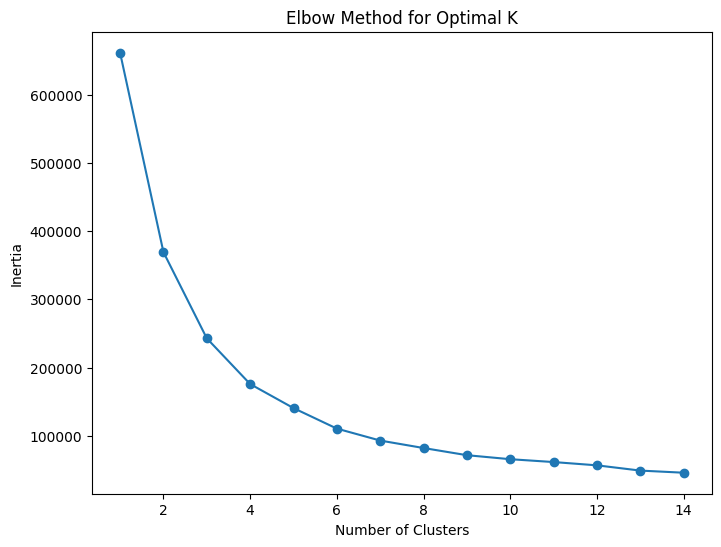

In [49]:
inertia = []
movement_data = raw_data[2025][classification_cols]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(movement_data)

for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 15), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

/var/folders/ps/8c5dgs652ps4ytkwvf0tm3080000gn/T/ipykernel_4455/256634704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data[2025]['Cluster'] = kmeans.fit_predict(features_scaled)


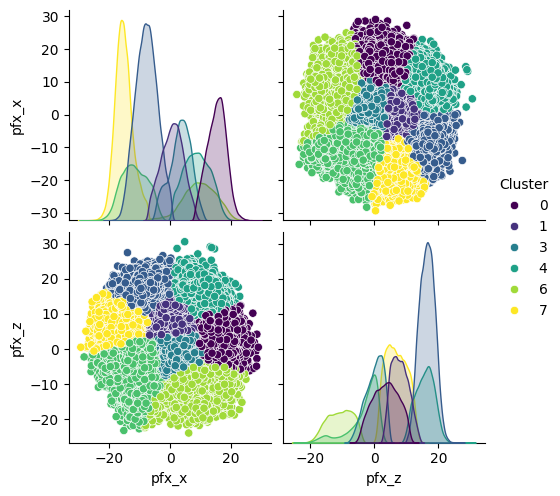

In [50]:
kmeans = KMeans(n_clusters=8, random_state=42)
raw_data[2025]['Cluster'] = kmeans.fit_predict(features_scaled)

sns.pairplot(raw_data[2025][['pfx_x', 'pfx_z' ,'Cluster']], hue='Cluster', palette='viridis', diag_kind='kde', markers='o')

In [53]:
cluster_means = raw_data[2025].groupby('Cluster')[['pfx_x', 'pfx_z']].mean()

print("Average values for each feature by cluster:")
print(cluster_means)

Average values for each feature by cluster:
             pfx_x      pfx_z
Cluster                      
0        15.208333   3.535835
1          0.54036   7.938624
2        -7.884179  16.414604
3         3.231332   0.028956
4         8.749509  15.761522
5       -11.831552  -3.272827
6         9.628514  -10.72275
7       -15.350915   6.885818
